# PCA through Singular Value Decomposition

In [59]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
c1 = np.matmul(u1, X)  # Coordinates along the first component
c2 = np.matmul(u2, X)  # Coordinates along the second component
print("\nCoordinates along u1: ", c1)
print("Coordinates along u2: ", c2)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it

X_approx = u1[:, None] * c1
print("Approximated X (from new basis):", X_approx)

X_proj = np.dot(U.T, X)
print(X_proj)
# Check that you got the original

X_rec = np.dot(U, X_proj)
print(X_rec)

X_proj[1,:] = [0,0,0]

X_recMin = np.dot(U, X_proj)
print(X_recMin)


Coordinates along u1:  [-4.46716435 -3.14809647  0.        ]
Coordinates along u2:  [-0.21081425  0.29914646  0.        ]
Approximated X (from new basis): [[ 1.80720735  1.27357371 -0.        ]
 [ 4.08528566  2.87897923 -0.        ]]
[[-4.46716435 -3.14809647  0.        ]
 [-0.21081425  0.29914646  0.        ]]
[[2. 1. 0.]
 [4. 3. 0.]]
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


# PCA on Iris data

In [6]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

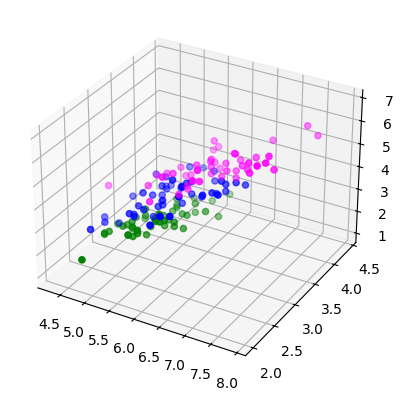

In [8]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


-1.8237263551175904e-15
1.0000000000000009
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


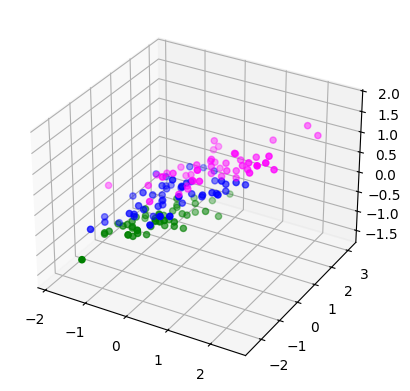

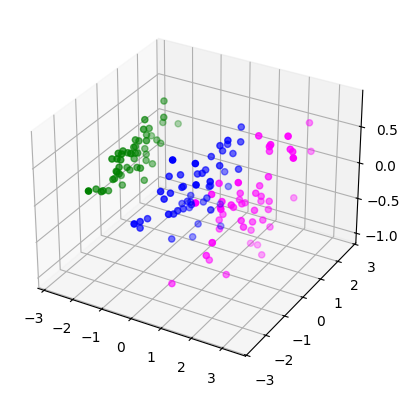

In [44]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

print(np.mean(Xpp[:,1]))
print(np.var(Xpp[:,1]))

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

axes3=plt.axes(projection='3d')
axes3.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes3.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes3.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')

plt.show()

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()


In [20]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_



array([2.93808505, 0.9201649 , 0.14774182])

In [12]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

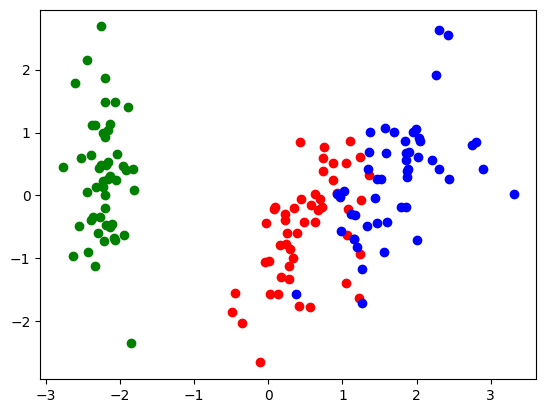

In [22]:
# Plot the principal components in 2D, mark different targets in color

plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='red')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='blue')


# KNN classifier

[[15  0  0]
 [ 0 12  1]
 [ 0  3 14]]


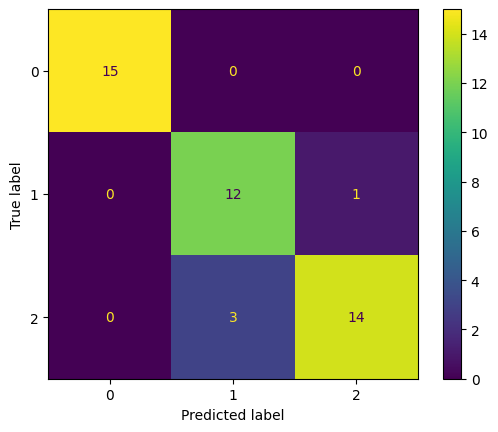

In [45]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size = 0.3)

from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



[[16  0  0]
 [ 0 15  0]
 [ 0  0 14]]


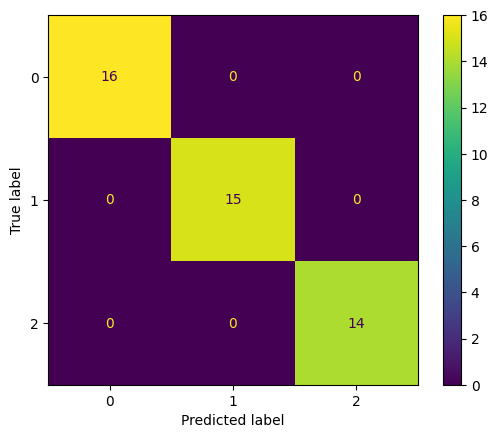

In [46]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

#X PCA 3 features

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size = 0.3)

from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

Data zeroed (Example):
[[-2.26470281  0.4800266   0.        ]
 [-2.08096115 -0.67413356  0.        ]
 [-2.36422905 -0.34190802  0.        ]
 [-2.29938422 -0.59739451  0.        ]
 [-2.38984217  0.64683538  0.        ]]
[[12  0  0]
 [ 0 14  5]
 [ 0  0 14]]


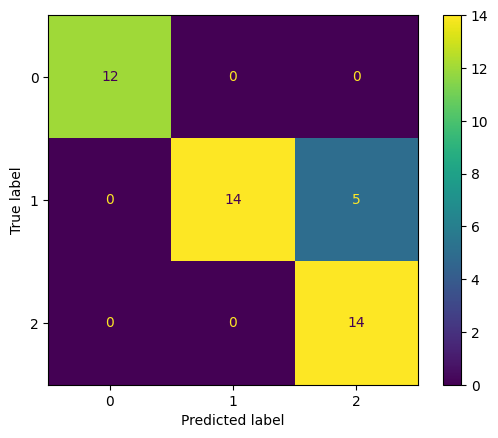

In [47]:
# Xpca 2 features most valuable

Xpca2features = Xpca.copy()
Xpca2features[:,2] = 0
print("Data zeroed (Example):")
print(Xpca2features[0:5, :])
X_train, X_test, y_train, y_test = train_test_split(Xpca2features, y, test_size = 0.3)


knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

Data zeroed (Example):
[[ 0.          0.4800266   0.12770602]
 [ 0.         -0.67413356  0.23460885]
 [ 0.         -0.34190802 -0.04420148]
 [ 0.         -0.59739451 -0.09129011]
 [ 0.          0.64683538 -0.0157382 ]]
[[7 6 5]
 [4 5 2]
 [7 4 5]]


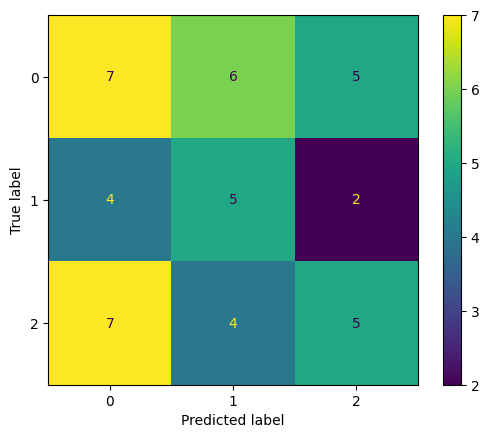

In [52]:
# Xpca 2 features least valuable

Xpca2featuresbad = Xpca.copy()
Xpca2featuresbad[:,0] = 0
print("Data zeroed (Example):")
print(Xpca2featuresbad[0:5, :])
X_train, X_test, y_train, y_test = train_test_split(Xpca2featuresbad, y, test_size = 0.3)


knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

Data zeroed (Example):
[[-0.90068117  1.01900435  0.          0.        ]
 [-1.14301691 -0.13197948  0.          0.        ]
 [-1.38535265  0.32841405  0.          0.        ]
 [-1.50652052  0.09821729  0.          0.        ]
 [-1.02184904  1.24920112  0.          0.        ]]
[[18  1  0]
 [ 0  4  9]
 [ 0  6  7]]


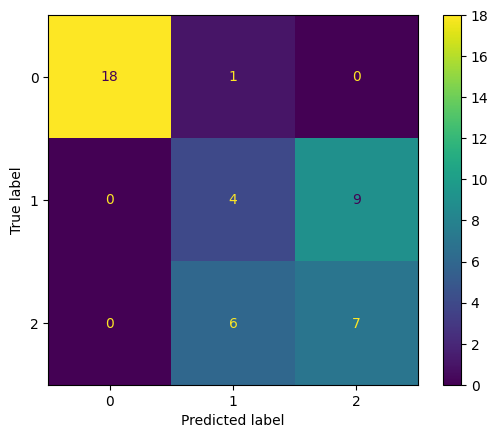

In [53]:
# Xpp 2 features

Xpp2 = Xpp.copy()
Xpp2[:,2:4] = 0
print("Data zeroed (Example):")
print(Xpp2[0:5, :])
X_train, X_test, y_train, y_test = train_test_split(Xpp2, y, test_size = 0.3)


knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix

print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)